In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df1=pd.read_excel('LungCap Dataset.xls')
df1.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [5]:
df1.size

4350

In [6]:
df1.shape

(725, 6)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
LungCap(cc)       725 non-null float64
Age( years)       725 non-null int64
Height(inches)    725 non-null float64
Smoke             725 non-null object
Gender            725 non-null object
Caesarean         725 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [8]:
df1.describe()

,LungCap(cc),Age( years),Height(inches)
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


# Graphical Representation

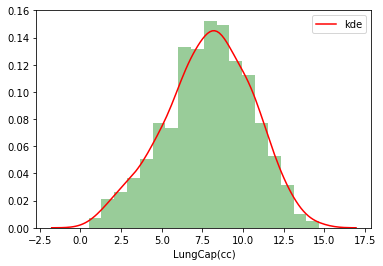

In [10]:
sns.distplot(df1['LungCap(cc)'],kde_kws={'color':'red','label':'kde'},hist_kws={'color':'green'})#Kernel Density Plot
plt.show()

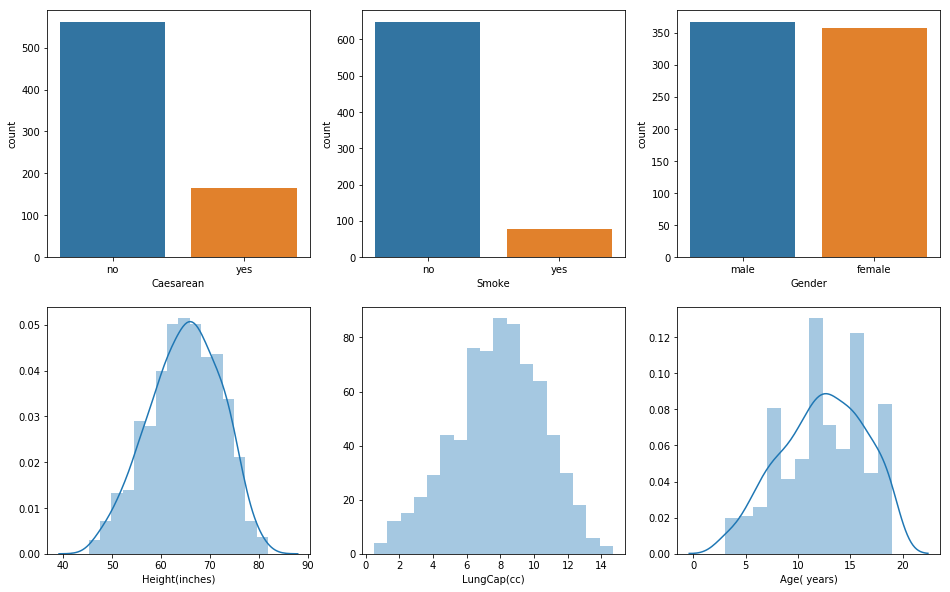

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.countplot('Caesarean',data=df1,ax=axes[0,0])
sns.countplot('Smoke',data=df1,ax=axes[0,1])
sns.countplot('Gender',data=df1,ax=axes[0,2])
sns.distplot(df1['Height(inches)'],ax=axes[1,0])
sns.distplot(df1['LungCap(cc)'],kde=False,ax=axes[1,1])
sns.distplot(df1['Age( years)'],kde=True,ax=axes[1,2])
plt.show()

In the above subplots ,count or records(in num) of each variable was shown. Now, I am going to make pie charts which can summarize the distribution of categorical Variables

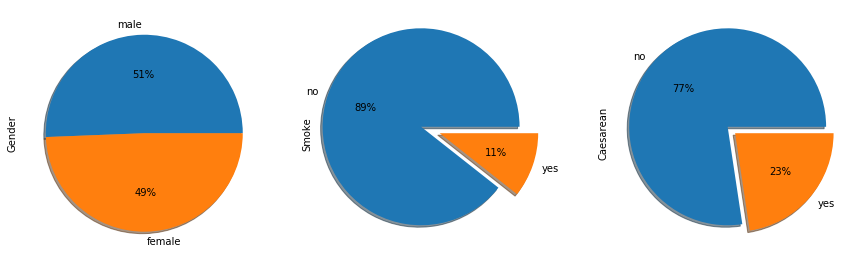

In [13]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
df1['Gender'].value_counts().plot.pie(explode = [0,0],autopct = '%1.0f%%',ax=axes[0],shadow = True)
df1['Smoke'].value_counts().plot.pie(explode = [0.2,0],autopct = '%1.0f%%',ax=axes[1],shadow = True)
df1['Caesarean'].value_counts().plot.pie(explode = [0.1,0],autopct = '%1.0f%%',ax=axes[2],shadow = True)
plt.show()

Above figure shows the percentage of each categorical variable. We can say that Men are more than women,Smokers are less when compared to Non-smokers and people who born by Caesarean are less when compared with people not born by Caesarean

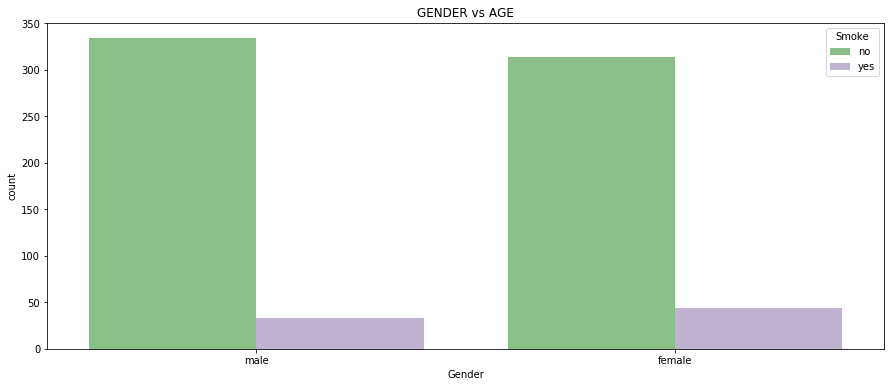

In [15]:
fig=plt.figure(figsize=(15,6))
sns.countplot(x='Gender',data=df1,hue='Smoke',palette='Accent')
plt.title('GENDER vs AGE')
plt.show()

Many non smokers are there in both male and female.

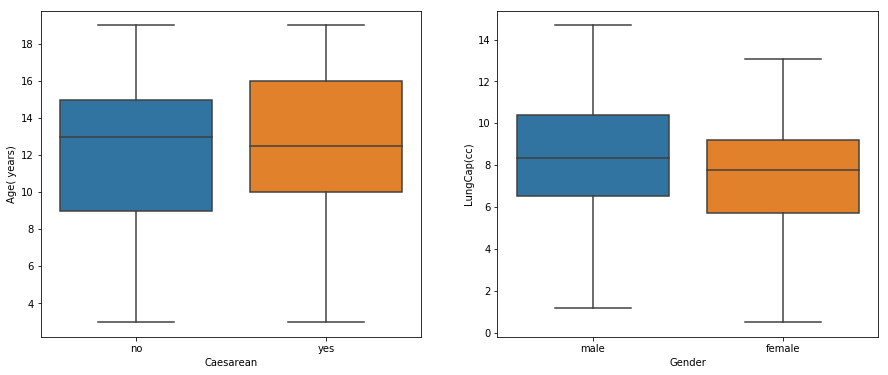

In [16]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(y='Age( years)',data=df1,x='Caesarean',ax=axes[0])
sns.boxplot(y='LungCap(cc)',data=df1,x='Gender',ax=axes[1])
plt.show()

 In the first plot the median of age of people not born by Caesarean is 13yrs and born by Caesarean is 12yrs.
 In the second plot,the medians of lungcapacities for Male and Female are 8.5cc and 8cc
 

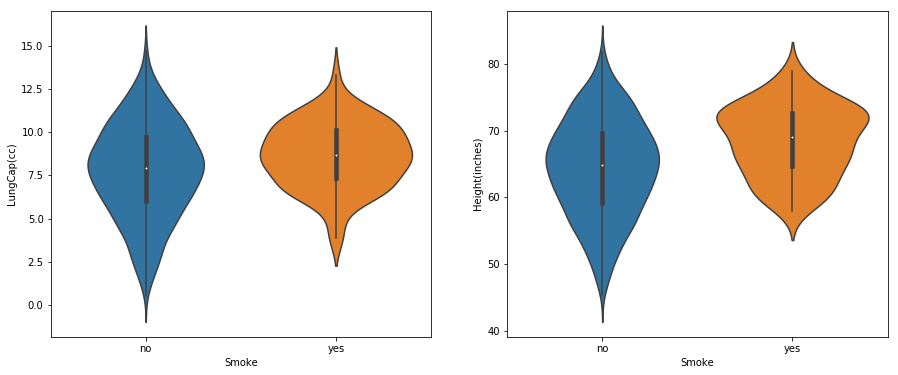

In [17]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.violinplot(x='Smoke',data=df1,y='LungCap(cc)',ax=axes[0])
sns.violinplot(x='Smoke',data=df1,y='Height(inches)',ax=axes[1])
plt.show()

Most smokers have huge lung capacity.
Most smokers are taller compared to non smokers.


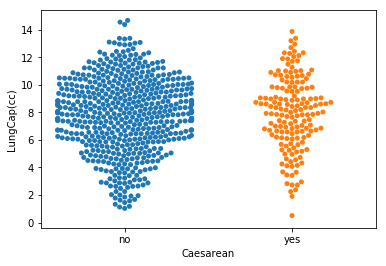

In [19]:
sns.swarmplot(y='LungCap(cc)',data=df1,x='Caesarean')
plt.show()

People  not born with caesaran have higher lung capacity.

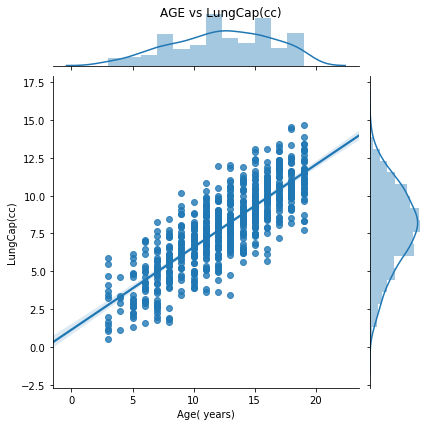

In [21]:
sns.jointplot(x='Age( years)',y='LungCap(cc)',data=df1,kind='reg')
plt.suptitle('AGE vs LungCap(cc)')
plt.show()

We can observe that as age increases the lung capacity decreases.

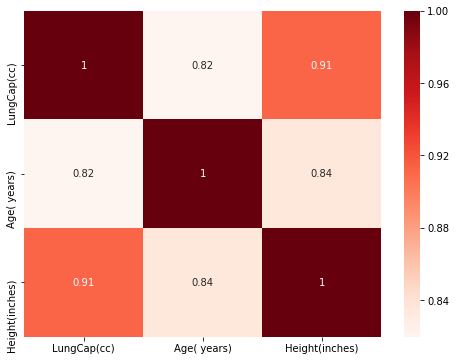

In [23]:
fig=plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(),cmap='Reds',annot=True)
plt.show()

Height and Lung capacity are having highest corelation.

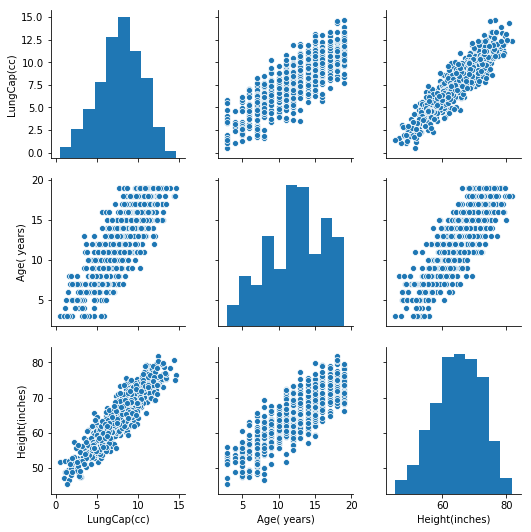

In [24]:
sns.pairplot(df1)
plt.show()

We can observe trends in all the plots.

# Descriptive Statistics about the Dataset

In [25]:
df1.mean()

LungCap(cc)        7.863148
Age( years)       12.326897
Height(inches)    64.836276
dtype: float64

In [26]:
df1.median()

LungCap(cc)        8.0
Age( years)       13.0
Height(inches)    65.4
dtype: float64

In [27]:
df1.mode()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,8.35,13,65.4,no,male,no


In [29]:
df1.min()

LungCap(cc)        0.507
Age( years)            3
Height(inches)      45.3
Smoke                 no
Gender            female
Caesarean             no
dtype: object

In [30]:
df1.max()

LungCap(cc)       14.675
Age( years)           19
Height(inches)      81.8
Smoke                yes
Gender              male
Caesarean            yes
dtype: object

In [33]:
df1[['Age( years)','LungCap(cc)','Height(inches)']].max()-df1[['Age( years)','LungCap(cc)','Height(inches)']].min()

Age( years)       16.000
LungCap(cc)       14.168
Height(inches)    36.500
dtype: float64

In [35]:
print('Q1:',df1.quantile(q=0.25))

Q1: LungCap(cc)        6.15
Age( years)        9.00
Height(inches)    59.90
Name: 0.25, dtype: float64


In [36]:
print('Q2:',df1.quantile(q=0.5))

Q2: LungCap(cc)        8.0
Age( years)       13.0
Height(inches)    65.4
Name: 0.5, dtype: float64


In [37]:
print('Q3:',df1.quantile(q=0.75))

Q3: LungCap(cc)        9.8
Age( years)       15.0
Height(inches)    70.3
Name: 0.75, dtype: float64


In [38]:
print('IQR:',df1.quantile(0.75)-df1.quantile(0.25))

IQR: LungCap(cc)        3.65
Age( years)        6.00
Height(inches)    10.40
dtype: float64


In [39]:
df1.var()

LungCap(cc)        7.086288
Age( years)       16.038019
Height(inches)    51.870878
dtype: float64

In [40]:
df1.std()

LungCap(cc)       2.662008
Age( years)       4.004750
Height(inches)    7.202144
dtype: float64

In [41]:
df1.mad()

LungCap(cc)       2.140149
Age( years)       3.314085
Height(inches)    5.887390
dtype: float64

In [42]:
skewness=df1.skew()
skewness

LungCap(cc)      -0.227873
Age( years)      -0.257944
Height(inches)   -0.226494
dtype: float64

In [43]:
kurtosis=df1.kurt()
kurtosis

LungCap(cc)      -0.312406
Age( years)      -0.697093
Height(inches)   -0.499582
dtype: float64